In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as s
import numpy as np

In [3]:
# import the data
prijzen = pd.read_csv('brandstofprijzen.csv', delimiter = ';', index_col = 'Perioden', parse_dates = ['Perioden'])

# resample the data to yearly average
prijsjaar = prijzen.resample('YE', kind = 'period').mean()

# filter the yearly average to 2006-2018
prijsjaar0618 = prijsjaar.loc['2006':'2018']

# seperate the fuel type Benzine
benzinejaar0618 = prijsjaar.loc['2006':'2018', 'BenzineEuro95_1']

# seperate the fuel type Diesel
dieseljaar0618 = prijsjaar.loc['2006':'2018', 'Diesel_2']

# calculate the average price
gemjaar0618 =  (benzinejaar0618 + dieseljaar0618) / 2

C:\Users\luket\AppData\Local\Temp\ipykernel_228\1070452490.py:5: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  prijsjaar = prijzen.resample('YE', kind = 'period').mean()


In [4]:
data2 = pd.read_csv("Traffic_motor_vehicles_21102024_112422.csv", delimiter=';', decimal='.', index_col='Periods')
distances = data2[data2['Types of vehicle'].isin(['Total motor vehicles'])]['Kilometres in the Netherlands/Total kilometres in the Netherlands (million km)']

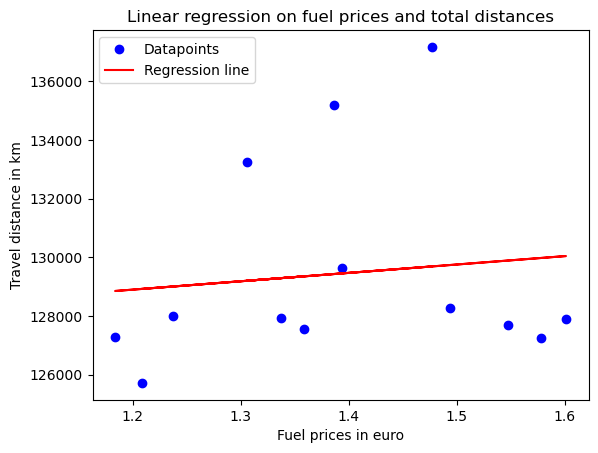

In [5]:
# plot the datapoints
plt.plot(gemjaar0618.values, distances, 'bo', label = 'Datapoints')

# perform linear regression
line1 = s.linregress(gemjaar0618.values, distances)

# plot the fitted line
plt.plot(gemjaar0618.values, gemjaar0618.values * line1.slope + line1.intercept, 'r', label = 'Regression line')

# add the legend and axis lable
plt.legend()
plt.xlabel('Fuel prices in euro')
plt.ylabel('Travel distance in km')

# add the title
plt.title('Linear regression on fuel prices and total distances');

In [6]:
# resample the data to yearly average
prijsjaar = prijzen.resample('YE', kind = 'period').mean()

# resample the data to monthly average
prijsmaand = prijzen.resample('ME', kind = 'period').mean()
# filter the monthly average to 2010-2017
prijsmaand1017 = prijsmaand.loc['2010':'2017']

# filter the yearly average to 2010-2017
prijsjaar1017 = prijsjaar.loc['2010':'2017']

# seperate the fuel type Benzine
benzinejaar1017 = prijsjaar.loc['2010':'2017', 'BenzineEuro95_1']
benzinemaand1017 = prijsmaand.loc['2010':'2017', 'BenzineEuro95_1']

# seperate the fuel type Diesel
dieseljaar1017 = prijsjaar.loc['2010':'2017', 'Diesel_2']
dieselmaand1017 = prijsmaand.loc['2010':'2017', 'Diesel_2']  

# calculate the average price
gemmaand1017 = (benzinemaand1017 + dieselmaand1017) / 2
gemjaar1017 =  (benzinejaar1017 + dieseljaar1017) / 2

C:\Users\luket\AppData\Local\Temp\ipykernel_228\4266906484.py:2: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  prijsjaar = prijzen.resample('YE', kind = 'period').mean()
C:\Users\luket\AppData\Local\Temp\ipykernel_228\4266906484.py:5: FutureWarning: The 'kind' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  prijsmaand = prijzen.resample('ME', kind = 'period').mean()


C:\Users\luket\AppData\Local\Temp\ipykernel_228\4033117702.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cars[i] = car.iloc[2:,:].values[i]
C:\Users\luket\AppData\Local\Temp\ipykernel_228\4033117702.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  trains[i] = train.iloc[2:,:].values[i]


Text(0, 0.5, 'Travel distance in km')

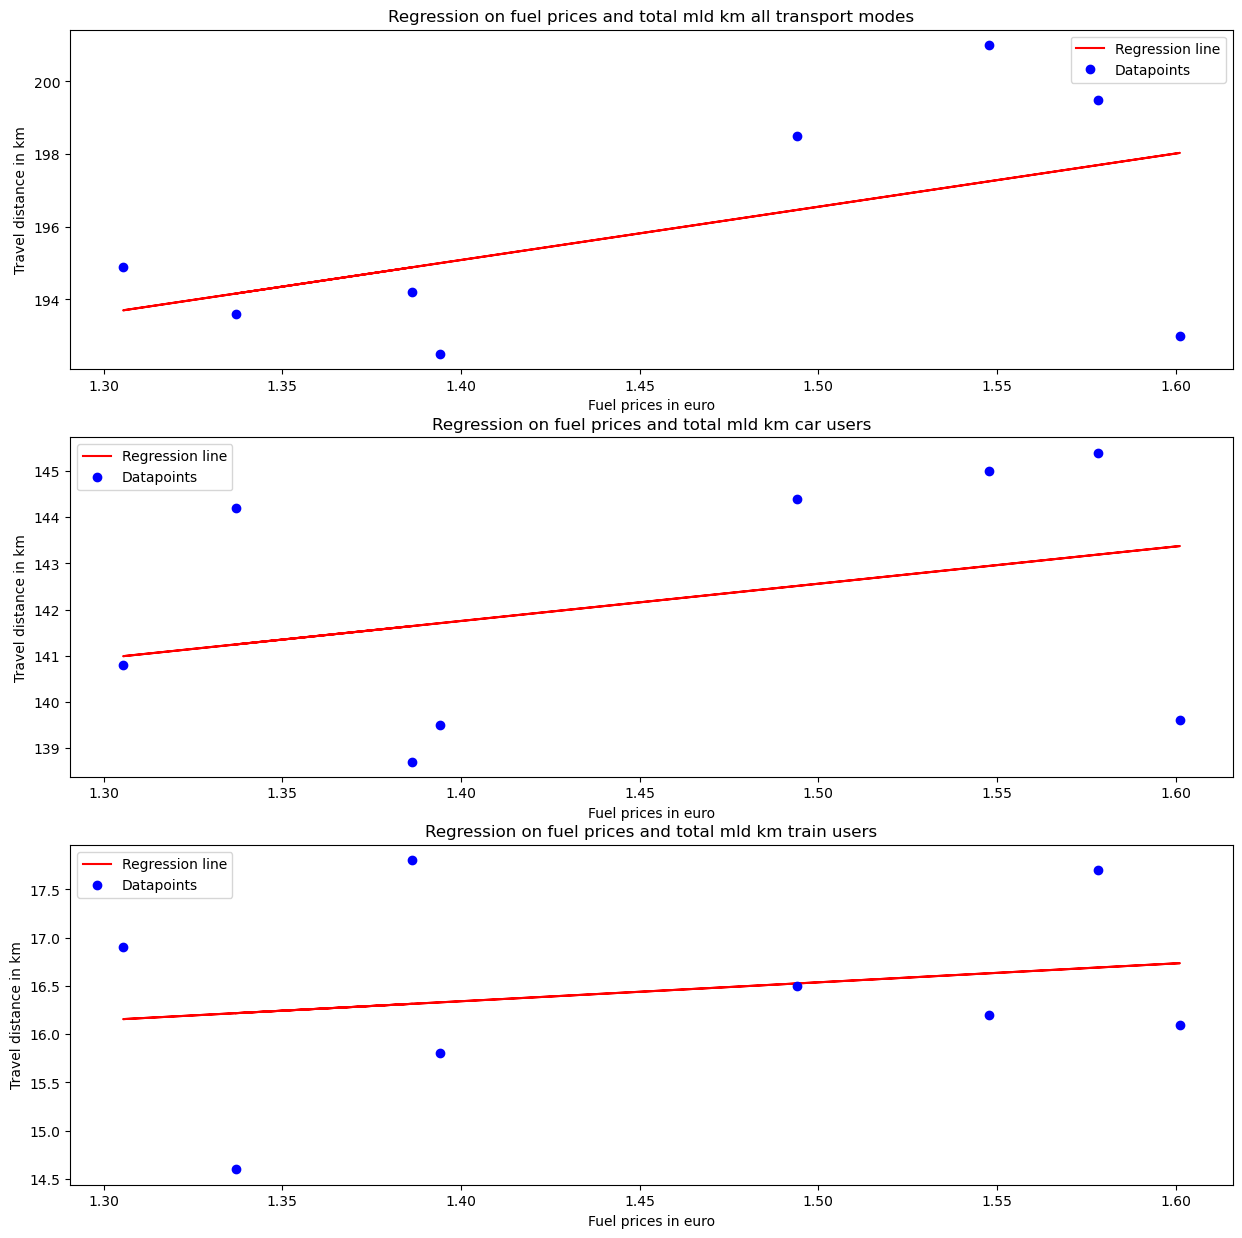

In [9]:
data = pd.read_csv("total_kilometers.csv", delimiter=';', decimal=',', skiprows=5)
#Data for the Netherlands:
tot = data[ data['Vervoerwijzen'].isin(['Totaal']) & data["Regio's"].isin(['Nederland'])].transpose() #total km's per year for all transport modes
car = ( data[ data['Vervoerwijzen'].isin(['Auto (bestuurder)']) & 
       data["Regio's"].isin(['Nederland']) ].reset_index(drop=True).transpose() + 
       data[ data['Vervoerwijzen'].isin(['Auto (passagier)']) & 
       data["Regio's"].isin(['Nederland']) ].reset_index(drop=True).transpose() 
      ) #total km's per year for car as driver and passenger
train = data[ data['Vervoerwijzen'].isin(['Trein']) & data["Regio's"].isin(['Nederland'])].reset_index(drop=True).transpose() #total km's per year for train passengers
tot.index = [0, 0, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017] #change index names, because names are 'mld km.1' instead of the years; first two rows are a list of names which are referring to transport mode and province
car.index = train.index = tot.index 

tot = tot.iloc[2:,0].transpose()

# transform the data into NumPy arrays
tots = np.zeros(len(tot))
cars = np.zeros(len(tot))
trains = np.zeros(len(tot))

for i in range(len(tot)):
      tots[i] = tot.values[i]
      cars[i] = car.iloc[2:,:].values[i]
      trains[i] = train.iloc[2:,:].values[i]

# figure with subplots
plt.figure(figsize=(15, 15))

plt.subplot(3,1,1)

lines = s.linregress(gemjaar1017.values, tots)
plt.plot(gemjaar1017.values, gemjaar1017.values * lines.slope + lines.intercept, 'r', label = 'Regression line')
plt.plot(gemjaar1017.values, tots, 'bo', label = 'Datapoints')

plt.title('Regression on fuel prices and total mld km all transport modes')
plt.legend()
plt.xlabel('Fuel prices in euro')
plt.ylabel('Travel distance in km')

plt.subplot(3,1,2)
linec = s.linregress(gemjaar1017.values, cars)
plt.plot(gemjaar1017.values, gemjaar1017.values * linec.slope + linec.intercept, 'r', label = 'Regression line')
plt.plot(gemjaar1017.values, cars, 'bo', label = 'Datapoints')

plt.title('Regression on fuel prices and total mld km car users')
plt.legend()
plt.xlabel('Fuel prices in euro')
plt.ylabel('Travel distance in km')

plt.subplot(3,1,3)
linet = s.linregress(gemjaar1017.values, trains)
plt.plot(gemjaar1017.values, gemjaar1017.values * linet.slope + linet.intercept, 'r', label = 'Regression line')
plt.plot(gemjaar1017.values, trains, 'bo', label = 'Datapoints')

plt.title('Regression on fuel prices and total mld km train users')
plt.legend()
plt.xlabel('Fuel prices in euro')
plt.ylabel('Travel distance in km')
